# NCIS and Census Dataset Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

I will be investigating 2 data sets for this project. The first is a dataset containing information about FBI firearms checks. Each time a gun vendor has a potential customer, they must call in and check whether the buyer has a criminal record or any other such indicator that makes them ineligible to purchase firearms. This data set contains a count of how many checks were performed, by state and fire arm type.

To supplement this dataset, a second dataset containing census information will be used. 

### Question(s) for Analysis

I plan on exporing the following questions over the course of this report:

1. How does the number of firearm checks vary by state?

2. How do firearm checks differ between states with varying income levels?

The first dataset is census information which has data on states, their populations in 2010 and 2016, and the median income from 2011-2015. The second one shows the number of firearm checks per state by year, broken down into different categories like permit, handgun, and long gun. These datasets are related by the state, allowing us to see how gun checks vary by population and income.

### Census Data Columns:
1. State
2. Population 2016
3. Population 2010
4. Median Income 2011-2015 (Dollars)

### Gun Data Columns:
1. state
2. year
3. permit
4. handgun
5. long_gun
6. multiple
7. admin
8. totals

In [4]:
#Importing statements for all of the packages that used
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling
When exploring the data sets, and making decisions on how to clean them, methods like .info(), .isna().sum() and .dtypes() helped me identify columns with many missing values and make sure they had correct data types. Others like .head() helped me see the actual data structure and get a better feeling for the information contained in each.

In [5]:
# Loading in the data
df_cen = pd.read_csv('Database_Ncis_and_Census_data/US_Census_Data.csv')
df_gun = pd.read_csv('Database_Ncis_and_Census_data/gun_data.csv')

In [ ]:
# The following are the methods I used to inspect data types, and identify erroneous or missing data.

# Inspecting df_cen
df_cen.info() 
df_cen.describe() 
df_cen.head() 
df_cen.isna().sum() 
df_cen.dtypes

# Inspecting df_gun
df_gun.info()
df_gun.describe()
df_gun.head()
df_gun.isna().sum()
df_gun['state'].value_counts()


### Data Cleaning: Gun Data
First, I decided to clean the df_gun dataset. Using the methods above like .info(), I was able to identify the columns that are relevant to my investigation, and the columns that should be removed. My main reason for keeping only the selected columns was that there were far too many missing values in the others. I want to investgate only data that is related to the purchaces of handguns, long guns and any requests for gun permits. The gun data had totals by month and year whereas the census data had only 3 different date metrics. I had to aggregate the gun data for each of those metrcis so that my findings could be relevant.

In [6]:
# Removing all unnecessary columns from df_gun
columns_to_keep = ['month', 'state', 'permit', 'handgun', 'long_gun', 'multiple', 'admin', 'totals']
df_gun_clean = df_gun[columns_to_keep]

df_gun_clean

,month,state,permit,handgun,long_gun,multiple,admin,totals
0,2017-09,Alabama,16717.0,5734.0,6320.0,317,0.0,32019
1,2017-09,Alaska,209.0,2320.0,2930.0,160,0.0,6303
2,2017-09,Arizona,5069.0,11063.0,7946.0,631,0.0,28394
3,2017-09,Arkansas,2935.0,4347.0,6063.0,366,51.0,17747
4,2017-09,California,57839.0,37165.0,24581.0,0,0.0,123506
...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,14.0,2.0,8,0.0,24
12481,1998-11,Washington,1.0,65.0,286.0,8,1.0,361
12482,1998-11,West Virginia,3.0,149.0,251.0,5,0.0,408
12483,1998-11,Wisconsin,0.0,25.0,214.0,2,0.0,241


### Aggregating rows by year
I decided to aggregate by year, and filter specific years later during the merging of the data sets.

In [7]:
# Extracting the year from the month column and adding the values into a new column called state
df_gun_clean['year'] = df_gun_clean['month'].astype(str).str[:4]

# Aggregating by the state and year
df_aggregated_by_year = df_gun_clean.groupby(['state', 'year']).sum(numeric_only=True).reset_index()
df_aggregated_by_year['year'] = df_aggregated_by_year['year'].astype(int)
df_aggregated_by_year

/tmp/ipykernel_31/2073275144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gun_clean['year'] = df_gun_clean['month'].astype(str).str[:4]


,state,year,permit,handgun,long_gun,multiple,admin,totals
0,Alabama,1998,0.0,10567.0,25723.0,278,0.0,36568
1,Alabama,1999,0.0,94544.0,149017.0,3195,0.0,246756
2,Alabama,2000,12.0,81983.0,136767.0,3149,0.0,221911
3,Alabama,2001,0.0,83885.0,134914.0,3490,0.0,230187
4,Alabama,2002,0.0,65294.0,111339.0,3548,0.0,221008
...,...,...,...,...,...,...,...,...
1095,Wyoming,2013,7001.0,26692.0,29774.0,1405,23.0,70671
1096,Wyoming,2014,7046.0,21655.0,27169.0,1249,17.0,63063
1097,Wyoming,2015,6674.0,22374.0,26264.0,1279,9.0,62339
1098,Wyoming,2016,7938.0,22569.0,25815.0,1295,36.0,63594


### Data Cleaning: Census Data
Next, I focused on cleaning the census data. I noticed that the fact column had many different rows, each specifying the type of data that was being displayed for each state. Using the .unique() method, I was able to narrow down which rows were relevant to my project and I removed the rest. I also identified the Fact Note column as the only one I needed to remove due to a high number of missing and irrelevant values. Lastly, I had to change the data frame's format so that I can merge it with the gun data table.

In [8]:
# Getting a list of all unique Fact column rows
unique_rows = df_cen['Fact'].unique()

print(unique_rows)

['Population estimates, July 1, 2016,  (V2016)'
 'Population estimates base, April 1, 2010,  (V2016)'
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)'
 'Population, Census, April 1, 2010'
 'Persons under 5 years, percent, July 1, 2016,  (V2016)'
 'Persons under 5 years, percent, April 1, 2010'
 'Persons under 18 years, percent, July 1, 2016,  (V2016)'
 'Persons under 18 years, percent, April 1, 2010'
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)'
 'Persons 65 years and over, percent, April 1, 2010'
 'Female persons, percent,  July 1, 2016,  (V2016)'
 'Female persons, percent, April 1, 2010'
 'White alone, percent, July 1, 2016,  (V2016)'
 'Black or African American alone, percent, July 1, 2016,  (V2016)'
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)'
 'Asian alone, percent, July 1, 2016,  (V2016)'
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)'
 'Two or More Races, 

In [9]:
# Removing all irrelevant rows from the "Fact" column
relevant_facts = ['Population estimates, July 1, 2016,  (V2016)','Population, Census, April 1, 2010',
                  'Median household income (in 2015 dollars), 2011-2015']
    
df_cen_clean = df_cen.query('Fact in @relevant_facts')

In [10]:
# Removing the 'Fact Note' column
df_cen_clean = df_cen_clean.drop(columns=['Fact Note'])

# Reshaping the Census Dataframe
I noticed that in the gun data, there is a state column with the states as the values, but in the census data, the states are columns themselves. I had to research a way to reshape the dataframe and found some additional functions to help me do so. One was the .set_index() which can turn a column's values into index labels and .T which flips the dataframe and makes the rows into columns and columns into rows. I renamed the new columns for readibility, reverted the newly created index into a column of its own using reset.index() and renamed it to "State."

In [11]:
# Setting the values in the 'Fact' column as the index and transposing the dataframe
df_cen_clean = df_cen_clean.set_index('Fact').T

In [12]:
df_cen_clean

Fact,"Population estimates, July 1, 2016, (V2016)","Population, Census, April 1, 2010","Median household income (in 2015 dollars), 2011-2015"
Alabama,"4,863,300","4,779,736","$43,623"
Alaska,"741,894","710,231","$72,515"
Arizona,"6,931,071","6,392,017","$50,255"
Arkansas,"2,988,248","2,915,918","$41,371"
California,"39,250,017","37,253,956","$61,818"
Colorado,"5,540,545","5,029,196","$60,629"
Connecticut,"3,576,452","3,574,097","$70,331"
Delaware,"952,065","897,934","$60,509"
Florida,"20,612,439","18,801,310","$47,507"
Georgia,"10,310,371","9,687,653","$49,620"


In [13]:
#Resetting the index to turn 'Fact' into a column again and renaming it state
df_cen_clean = df_cen_clean.reset_index().rename(columns={'index': 'State'})

In [14]:
#Renaming the new columns with simpler names
df_cen_clean.columns = ['State', 'Population 2016', 'Population 2010', 
                        'Median Income 2011-2015 (Dollars)']

I got an error when trying to convert datatypes to int and float, so I had to convert them to strings before doing so.

In [15]:
#Converting datatypes to str
df_cen_clean['Population 2016'] = df_cen_clean['Population 2016'].astype(str)
df_cen_clean['Population 2010'] = df_cen_clean['Population 2010'].astype(str)
df_cen_clean['Median Income 2011-2015 (Dollars)'] = df_cen_clean['Median Income 2011-2015 (Dollars)'].astype(str)

I had to remove the "," from the values before converting the datatypes. I kept getting errors so I removed any spaces before or after thee values that could be causing issues.

In [16]:
# Removing any leading or trailing blank characters
df_cen_clean['Population 2016'] = df_cen_clean['Population 2016'].str.strip()
df_cen_clean['Population 2010'] = df_cen_clean['Population 2010'].str.strip()
df_cen_clean['Median Income 2011-2015 (Dollars)'] = df_cen_clean['Median Income 2011-2015 (Dollars)'].str.strip()

I kept getting an error that the kernel was having trouble converting a value with 2 commas in it. I did some research and found that adding regex=False to .replace would make the program treat what is being replaced as a simple string instead of of a regular expression. This fixed the error I was getting.

In [17]:
# Cleaning and converting the Population 2016 and Population 2010 columns
df_cen_clean['Population 2016'] = df_cen_clean['Population 2016'].str.replace(',', '', regex=False).astype(int)
df_cen_clean['Population 2010'] = df_cen_clean['Population 2010'].str.replace(',', '', regex=False).astype(int)

# Cleaning and converting the Median Income 2011-2015 (Dollars) column
df_cen_clean['Median Income 2011-2015 (Dollars)'] = df_cen_clean['Median Income 2011-2015 (Dollars)'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)


In [18]:
#verifying the clean dataset
df_cen_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   State                              50 non-null     object 
 1   Population 2016                    50 non-null     int64  
 2   Population 2010                    50 non-null     int64  
 3   Median Income 2011-2015 (Dollars)  50 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ KB


# Merging the datasets
Now I can merge the data. I am creating 3 new data sets for each metric time metric being analyzed (2016, 2010, and 2005-2011). I decided it would be easier to do this during the merging process. First I checked my final data frames before merging.

In [19]:
df_cen_clean

,State,Population 2016,Population 2010,Median Income 2011-2015 (Dollars)
0,Alabama,4863300,4779736,43623.0
1,Alaska,741894,710231,72515.0
2,Arizona,6931071,6392017,50255.0
3,Arkansas,2988248,2915918,41371.0
4,California,39250017,37253956,61818.0
5,Colorado,5540545,5029196,60629.0
6,Connecticut,3576452,3574097,70331.0
7,Delaware,952065,897934,60509.0
8,Florida,20612439,18801310,47507.0
9,Georgia,10310371,9687653,49620.0


In [20]:
df_aggregated_by_year

,state,year,permit,handgun,long_gun,multiple,admin,totals
0,Alabama,1998,0.0,10567.0,25723.0,278,0.0,36568
1,Alabama,1999,0.0,94544.0,149017.0,3195,0.0,246756
2,Alabama,2000,12.0,81983.0,136767.0,3149,0.0,221911
3,Alabama,2001,0.0,83885.0,134914.0,3490,0.0,230187
4,Alabama,2002,0.0,65294.0,111339.0,3548,0.0,221008
...,...,...,...,...,...,...,...,...
1095,Wyoming,2013,7001.0,26692.0,29774.0,1405,23.0,70671
1096,Wyoming,2014,7046.0,21655.0,27169.0,1249,17.0,63063
1097,Wyoming,2015,6674.0,22374.0,26264.0,1279,9.0,62339
1098,Wyoming,2016,7938.0,22569.0,25815.0,1295,36.0,63594


Filtering the gun data, merging it to the census data and dropping unnecessary columns. 
First, for 2010.

In [21]:
# Filtering the gun data for the year 2010
df_gun_2010 = df_aggregated_by_year[df_aggregated_by_year['year'] == 2010]

# Merging the filtered gun data with the clean census date on the state column
df_merge_2010 = pd.merge(df_gun_2010, df_cen_clean, left_on='state', right_on='State', how='inner')

# Dropping unnecessary columns in-place
df_merge_2010.drop(columns=['Population 2016', 'state', 'Median Income 2011-2015 (Dollars)'], inplace=True)

df_merge_2010

,year,permit,handgun,long_gun,multiple,admin,totals,State,Population 2010
0,2010,4621.0,116963.0,136519.0,5465,19.0,308607,Alabama,4779736
1,2010,0.0,25720.0,33177.0,1519,0.0,65909,Alaska,710231
2,2010,24751.0,89162.0,69067.0,3768,0.0,206050,Arizona,6392017
3,2010,31305.0,49992.0,72206.0,3145,64.0,191448,Arkansas,2915918
4,2010,295252.0,245159.0,275458.0,0,530.0,816399,California,37253956
5,2010,12928.0,130155.0,129642.0,28094,1.0,300820,Colorado,5029196
6,2010,90942.0,47545.0,40546.0,0,92.0,179595,Connecticut,3574097
7,2010,0.0,9230.0,9466.0,337,0.0,19240,Delaware,897934
8,2010,35.0,332371.0,186675.0,15541,5468.0,559347,Florida,18801310
9,2010,95959.0,99145.0,95541.0,4278,0.0,333247,Georgia,9687653


Merging the dataframes for the year 2016.

In [22]:
# Filtering the gun data for the year 2016
df_gun_2016 = df_aggregated_by_year[df_aggregated_by_year['year'] == 2016]

# Merging the filtered gun data with the clean census date on the state column
df_merge_2016 = pd.merge(df_gun_2016, df_cen_clean, left_on='state', right_on='State', how='inner')

# Dropping unnecessary columns in-place
df_merge_2016.drop(columns=['Population 2010', 'state', 'Median Income 2011-2015 (Dollars)'], inplace=True)

df_merge_2016

,year,permit,handgun,long_gun,multiple,admin,totals,State,Population 2016
0,2016,291039.0,153123.0,121963.0,6545,5.0,616947,Alabama,4863300
1,2016,3121.0,37491.0,36887.0,2316,0.0,87647,Alaska,741894
2,2016,87771.0,166784.0,108988.0,7908,0.0,416279,Arizona,6931071
3,2016,55456.0,80244.0,82120.0,4400,143.0,266014,Arkansas,2988248
4,2016,1036981.0,560355.0,554550.0,0,0.0,2377167,California,39250017
5,2016,85087.0,242502.0,180026.0,14293,0.0,540514,Colorado,5540545
6,2016,148949.0,122375.0,43813.0,0,108.0,317692,Connecticut,3576452
7,2016,8440.0,25574.0,21746.0,1034,0.0,59430,Delaware,952065
8,2016,337086.0,662308.0,316232.0,25142,264.0,1435340,Florida,20612439
9,2016,233115.0,194800.0,128277.0,7478,0.0,612985,Georgia,10310371


Merging for 2011-2015.

In [23]:
# Filter gun data for the years 2011 to 2015
df_gun_2011_to_2015 = df_aggregated_by_year[df_aggregated_by_year['year'].between(2011, 2015)]

# Merge the filtered gun data with the clean census data on the state column
df_merge_2011_to_2015 = pd.merge(df_gun_2011_to_2015, df_cen_clean, left_on='state', right_on='State', how='inner')

# Drop unnecessary columns in-place
df_merge_2011_to_2015.drop(columns=['Population 2010', 'state', 'Population 2016'], inplace=True)

df_merge_2011_to_2015

,year,permit,handgun,long_gun,multiple,admin,totals,State,Median Income 2011-2015 (Dollars)
0,2011,5036.0,130490.0,146290.0,6262,0.0,336102,Alabama,43623.0
1,2012,6135.0,177239.0,184072.0,9227,1.0,431356,Alabama,43623.0
2,2013,100231.0,195052.0,203530.0,9270,2.0,563880,Alabama,43623.0
3,2014,204273.0,178355.0,170815.0,9254,0.0,621305,Alabama,43623.0
4,2015,246203.0,243734.0,176075.0,10781,0.0,737509,Alabama,43623.0
...,...,...,...,...,...,...,...,...,...
245,2011,3992.0,18586.0,23558.0,1020,143.0,52224,Wyoming,58840.0
246,2012,3902.0,24029.0,28263.0,1400,18.0,63356,Wyoming,58840.0
247,2013,7001.0,26692.0,29774.0,1405,23.0,70671,Wyoming,58840.0
248,2014,7046.0,21655.0,27169.0,1249,17.0,63063,Wyoming,58840.0


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: How does the number of firearm checks vary by state?

Here you can see the distribution of firearm checks by state. 

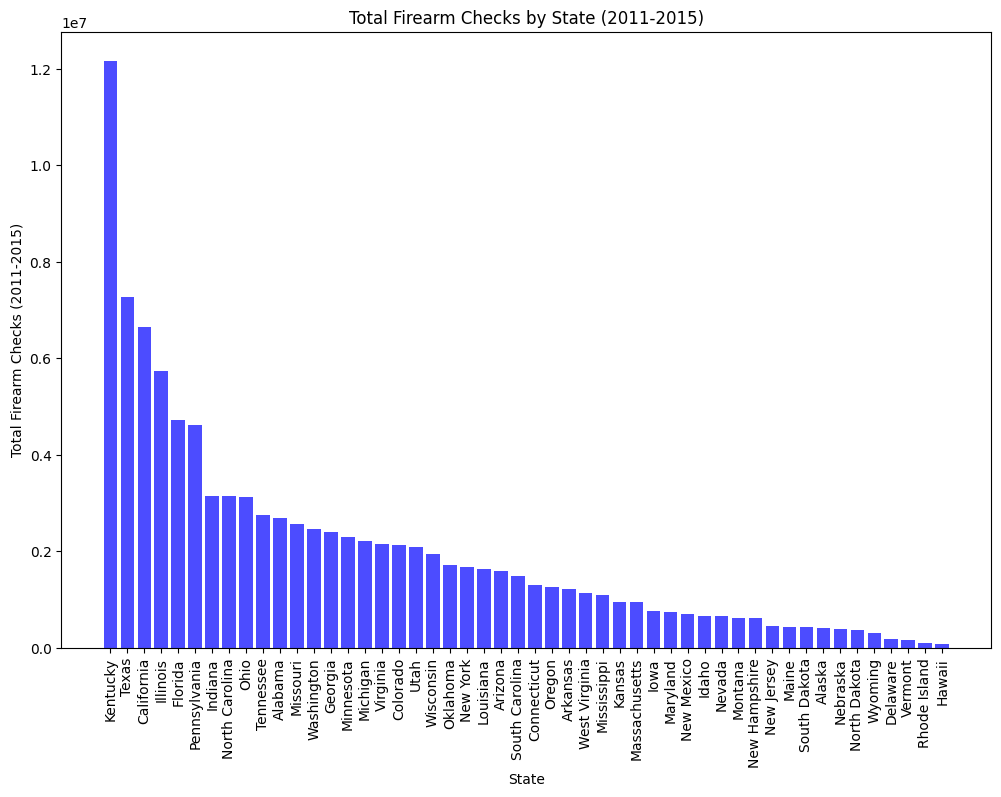

In [24]:
# Aggregating the total firearm checks by state
df_totals_by_state = df_merge_2011_to_2015.groupby('State')['totals'].sum().reset_index()

# Sorting by total firearm checks
df_totals_by_state = df_totals_by_state.sort_values(by='totals', ascending=False)

# Visualizing the total firearm checks by state using a bar plot
plt.figure(figsize=(12, 8))
plt.bar(df_totals_by_state['State'], df_totals_by_state['totals'], color='blue', alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Firearm Checks (2011-2015)')
plt.title('Total Firearm Checks by State (2011-2015)')
plt.show()

### Research Question 2: How do firearm checks differ between states with varying income levels?

First, I aggregate the data by median income, total firearm checks and state.

In [25]:
# Grouping by State
df_grouped = df_merge_2011_to_2015.groupby('State')

# Calculating total firearm checks and mean median income
df_totals = df_grouped['totals'].sum().reset_index()
df_mean_income = df_grouped['Median Income 2011-2015 (Dollars)'].mean()

# Merging the results
df_income_firearm_checks = pd.merge(df_totals, df_mean_income, on='State')

df_income_firearm_checks

,State,totals,Median Income 2011-2015 (Dollars)
0,Alabama,2690152,43623.0
1,Alaska,422189,72515.0
2,Arizona,1596290,50255.0
3,Arkansas,1223785,41371.0
4,California,6642294,61818.0
5,Colorado,2133138,60629.0
6,Connecticut,1295949,70331.0
7,Delaware,186642,60509.0
8,Florida,4733035,47507.0
9,Georgia,2412865,49620.0


Here you can see the correlation between median income and firearms checks.

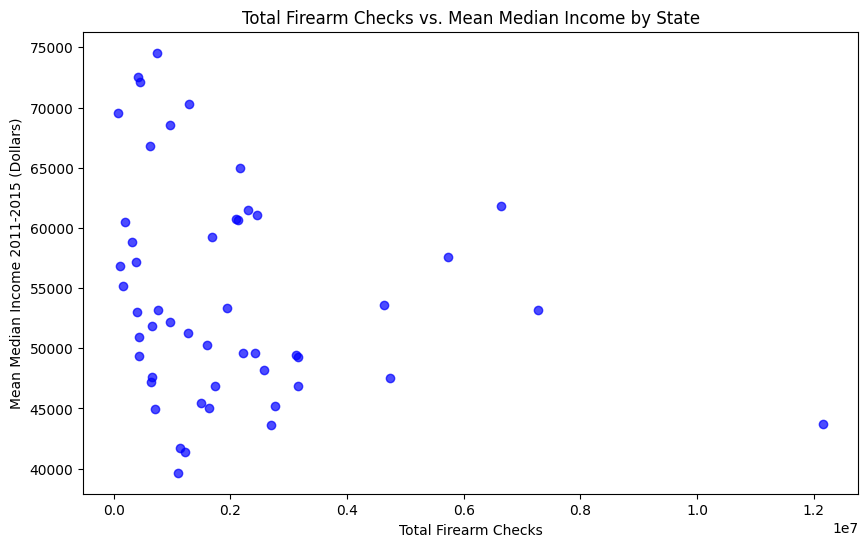

In [26]:
# Using a funtion
def plot_scatter(x_data, y_data, x_label, y_label, title, color='blue', alpha=0.7):
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, color=color, alpha=alpha)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
# Plotting total firearm checks vs. mean median income
plot_scatter(
    df_income_firearm_checks['totals'],
    df_income_firearm_checks['Median Income 2011-2015 (Dollars)'],
    'Total Firearm Checks',
    'Mean Median Income 2011-2015 (Dollars)',
    'Total Firearm Checks vs. Mean Median Income by State')

### How does the population of each state correlate with the number of firearm checks for 2010?

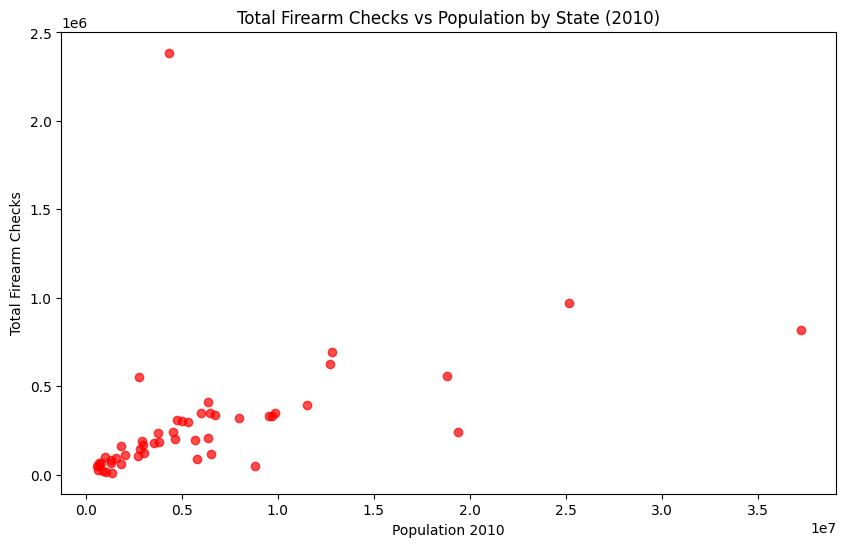

In [30]:
# Scatter plot to visualize the relationship between population and firearm checks in 2010
plot_scatter(
    df_merge_2010['Population 2010'],
    df_merge_2010['totals'],
    'Population 2010',
    'Total Firearm Checks',
    'Total Firearm Checks vs Population by State (2010)',
    color='red')

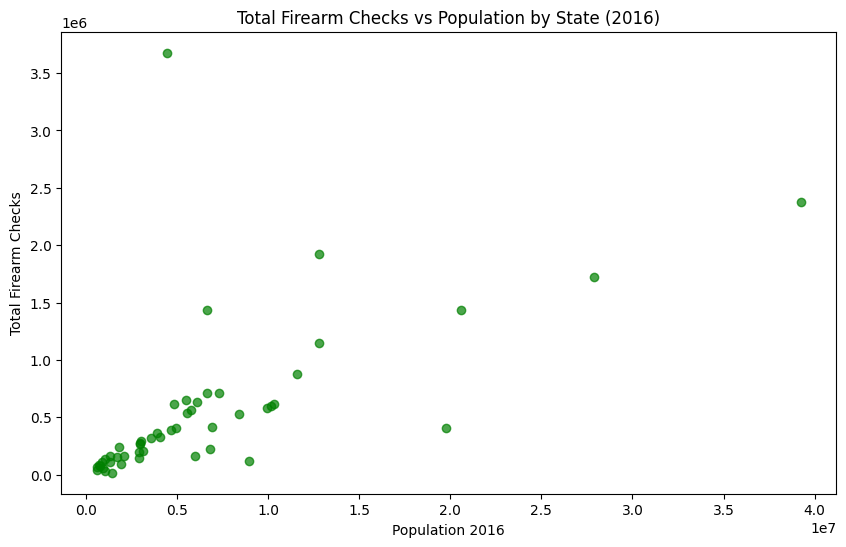

In [28]:
# Scatter plot to visualize the relationship between population and firearm checks in 2016
plot_scatter(
    df_merge_2016['Population 2016'],
    df_merge_2016['totals'],
    'Population 2016',
    'Total Firearm Checks',
    'Total Firearm Checks vs Population by State (2016)',
    color='green')

<a id='conclusions'></a>
## Conclusions

Kentucky had the highest number of firearm checks, even though its median income was low and its population wasn't much higher than other states. This makes Kentucky an outlier in the data. We also found that median income didn't seem to affect the number of firearm checks much, as most of the data points were somewhat evenly distributed on the lower side of firearms checks accross all income levels on the scatter plot. This means that income might not be a big factor in how many checks are done. Lastly, states with larger populations generally had more firearm checks. There were some limitations with the data. We only had population data for 2010 and 2016, so future research could look at more recent data and other factors to understand these trends better.

In [31]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 285609 bytes to Investigate_a_Dataset.html
